<a href="https://colab.research.google.com/github/ayushambhore/Netflix-Movies-And-Tv-Shows-Clustering/blob/main/Netflix_Movies_And_Tv_Shows_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Netflix Movies And Tv Shows Clustering



##### **Project Type**    - Unsupervised
##### **Contribution**    - Individual
##### **Name -** Ayush Ambhore


# **Project Summary -**

The project involves building a content-based recommender system for Netflix movies and TV shows using a dataset collected from Flixable, a third-party Netflix search engine. The dataset comprises 7787 rows and 12 columns, providing information about show IDs, types (TV show or movie), titles, directors, cast, country of production, date added to Netflix, release year, content rating, duration, genre, and brief descriptions.

The data exploration phase reveals that the 'director' column has the highest number of missing values, followed by the 'cast' column. To address this, we perform data preprocessing, including handling missing values, removing stopwords, punctuations, and non-ASCII characters, and lemmatizing the text. We also perform tokenization and vectorization to convert the text data into numerical vectors, making it suitable for machine learning models.

The model building process starts with dimensionality reduction using PCA to reduce the number of features to 3400 dimensions. The PCA-transformed data is then used to build two clustering models - KMeans and Agglomerative Clustering. For the KMeans model, we utilize the Elbow Method and Silhouette Score to find the optimal number of clusters. The KMeans clustering results in five clusters, each containing different proportions of movies and TV shows. The Agglomerative Clustering creates 11 clusters, providing insights into different content genres and patterns.

The content-based recommender system leverages the intrinsic features of the content, such as title, genre, description, and cast, to make personalized recommendations to users. It offers suggestions based on similarities between items, ensuring relevant and niche recommendations even for new users or items with limited information.

The project's focus on model building highlights the importance of data preprocessing, dimensionality reduction, and clustering algorithms in creating an effective content-based recommender system. By integrating external datasets like IMDB ratings or rotten tomatoes, we can enrich the recommendations with additional insights and enhance the system's performance further.

Overall, this project demonstrates how content-based recommender systems can provide valuable insights into content preferences and trends, guiding content creators and producers in generating captivating and well-suited content for viewers on streaming platforms like Netflix.






## **Business Context**

* Netflix is a popular streaming platform with a vast library of movies and TV shows.
* The dataset from Flixable provides valuable information about the content available on Netflix.
* Missing data in the 'director' and 'cast' columns poses a challenge for accurate content recommendations.
* Data preprocessing techniques are employed to clean and prepare the text data for analysis.
* Dimensionality reduction using PCA enables efficient processing and modeling of the content features.
* KMeans and Agglomerative Clustering are used to group similar shows and identify content patterns.
* The content-based recommender system uses intrinsic features to offer personalized show recommendations.
* Users will receive relevant suggestions based on similarities between items in the dataset.
* Integration with external datasets like IMDB ratings can further enhance the recommendation system.
* The project's insights help content creators tailor their content to user preferences and trends.
* An effective recommender system enhances user experience and engagement on the Netflix platform.



# **GitHub Link -**

https://github.com/ayushambhore/Netflix-Movies-And-Tv-Shows-Clustering

# **Problem Statement**


The objective of this project is to cluster Netflix TV shows and movies based on their intrinsic features such as director, cast, country, genre, and description. By doing so, we aim to group similar shows together and identify distinct content patterns within the dataset. Through text clustering techniques, we aim to provide valuable insights into content distribution and user preferences on the Netflix platform, ultimately enhancing the user experience and content recommendations.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Important modules
import pandas as pd
import numpy as np

#visulizaiton modules
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import matplotlib.cm as cm
import geopandas as gpd
!pip install country_converter --upgrade
import country_converter as coco
import plotly.express as px

#import string module
import string
string.punctuation

#import stats module
from scipy import stats

#nlp module
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from nltk.tokenize import TweetTokenizer
from sklearn.metrics.pairwise import cosine_similarity

#import fundamental models
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score,silhouette_samples
from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering
from yellowbrick.cluster import SilhouetteVisualizer


import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [2]:
# Load Dataset
url = 'https://raw.githubusercontent.com/ayushambhore/Netflix-Movies-And-Tv-Shows-Clustering/main/NETFLIX%20MOVIES%20AND%20TV%20SHOWS%20CLUSTERING.csv'
df = pd.read_csv(url)

### Dataset First View

In [3]:
# Dataset First Look
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


### Dataset Rows & Columns count

In [4]:
# Dataset Rows & Columns count
print(f' Row count = {df.shape[0]}\n Column count = {df.shape[1]}')

 Row count = 7787
 Column count = 12


### Dataset Information

In [5]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


#### Duplicate Values

In [6]:
# Dataset Duplicate Value Count
len(df[df.duplicated()])

0

#### Missing Values/Null Values

In [7]:
# Missing Values/Null Values
print(df.isnull().sum())

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64


In [8]:
print(df.isnull().sum().sum())

3631


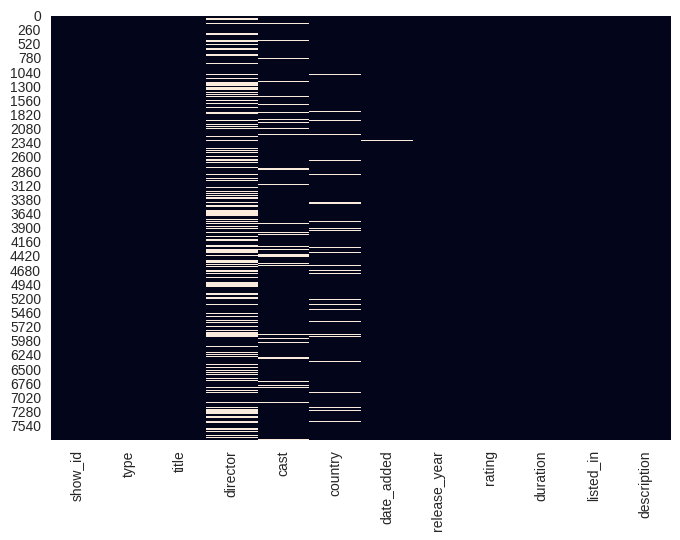

In [9]:
# Visualizing the missing values
sns.heatmap(df.isnull(), cbar=False);

### What did you know about your dataset?

The data set is about Netflix movies and tv shows. The data set have 7787 rows and 12 columns. The data have no duplicate rows. The data have 3631 missing values.

## ***2. Understanding Your Variables***

In [10]:
# Dataset Columns
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [11]:
# Dataset Describe
df.describe(include='all')

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,7787,7787,7787,5398,7069,7280,7777,7787.000000,7780,7787,7787,7787
unique,7787,2,7787,4049,6831,681,1565,NaN,14,216,492,7769
top,s1,Movie,3%,"Raúl Campos, Jan Suter",David Attenborough,United States,"January 1, 2020",NaN,TV-MA,1 Season,Documentaries,Multiple women report their husbands as missin...
freq,1,5377,1,18,18,2555,118,NaN,2863,1608,334,3
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.932580,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.757395,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018.000000,NaN,NaN,NaN,NaN


### Variables Description

1. show_id: An identifier or unique code for each show or movie in the dataset.
2. type: Indicates whether the entry is a "TV Show" or a "Movie".
3. title: The title or name of the TV show or movie.
4. director: The name of the director(s) or filmmaker(s) responsible for creating the content. This column is typically available for movies and may be empty or null for TV shows.
5. cast: The list of main actors or performers who are part of the show or movie.
6. country: The country or countries where the content was produced or originated from.
7. date_added: The date when the content was added to the Netflix catalog.
8. release_year: The year when the content was originally released (for movies) or first aired (for TV shows).
9. rating: The content rating assigned to the show or movie based on its suitability for different audiences (e.g., PG, PG-13, TV-MA, etc.).
10. duration: The duration or runtime of the content (e.g., 1 hour, 30 minutes).
11. listed_in: The category or genre under which the content is classified or listed on Netflix (e.g., Comedy, Action & Adventure, Sci-Fi & Fantasy).
12. description: A brief synopsis or summary of the plot or storyline of the show or movie.

### Check Unique Values for each variable.

In [12]:
# Check Unique Values for each variable.
for i in df.columns.tolist():
  print("No. of unique values in ",i,"is",df[i].nunique(),".")

No. of unique values in  show_id is 7787 .
No. of unique values in  type is 2 .
No. of unique values in  title is 7787 .
No. of unique values in  director is 4049 .
No. of unique values in  cast is 6831 .
No. of unique values in  country is 681 .
No. of unique values in  date_added is 1565 .
No. of unique values in  release_year is 73 .
No. of unique values in  rating is 14 .
No. of unique values in  duration is 216 .
No. of unique values in  listed_in is 492 .
No. of unique values in  description is 7769 .


## 3. ***Data Wrangling***

### Data Wrangling Code

In [13]:
# Assuming df is the name of your DataFrame
missing_values = df.isnull().sum()
total_rows = df.shape[0]

# Calculate the percentage of missing values for each column
percentage_missing_values = (missing_values / total_rows) * 100

print(percentage_missing_values)

show_id          0.000000
type             0.000000
title            0.000000
director        30.679337
cast             9.220496
country          6.510851
date_added       0.128419
release_year     0.000000
rating           0.089893
duration         0.000000
listed_in        0.000000
description      0.000000
dtype: float64



The "director" column in the dataset has the highest number of missing values, accounting for approximately 30.7% of the total data. The "cast" column follows with around 9% missing values. Additionally, the columns "country," "date_added," and "rating" also contain missing values.

In [14]:
# Missing Values/Null Values
print(df.isnull().sum())

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64


In [15]:
df['country'] = df['country'].fillna('Unknown')

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

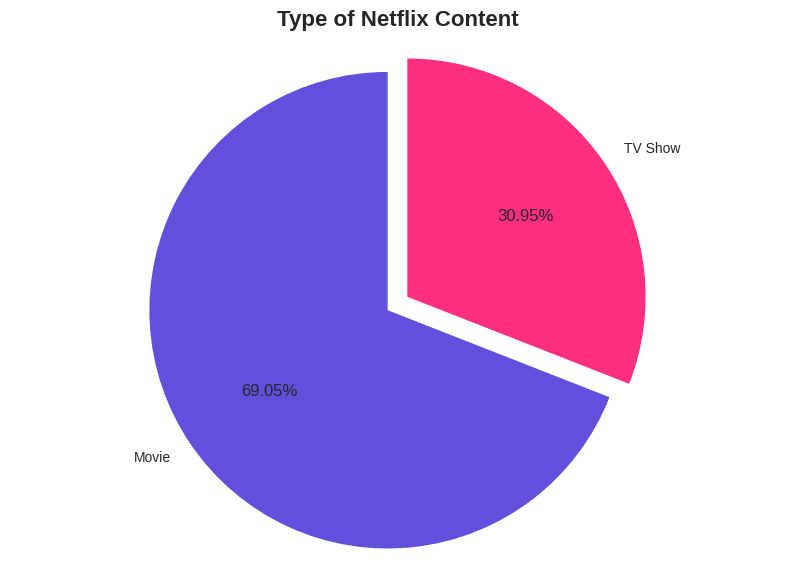

In [16]:
# Calculate the counts for each type
type_counts = df['type'].value_counts()

# Define colors for the pie chart
colors = [ '#6050DC','#FF2E7E']

# Create the pie chart
plt.figure(figsize=(10, 7))

# Plot the pie chart
wedges, texts, autotexts = plt.pie(type_counts, labels=type_counts.index, autopct='%1.2f%%',
                                   startangle=90, colors=colors, explode=[0.05, 0.05])

# Add a title
plt.title('Type of Netflix Content', fontsize=16, fontweight='bold')

# Create 3D-like effect by setting zorder for wedges and texts
for wedge, text, autotext in zip(wedges, texts, autotexts):
    wedge.set_zorder(10)
    text.set_zorder(11)
    autotext.set_zorder(12)

# Set aspect ratio to be equal so that the pie chart looks circular
plt.axis('equal')

# Show the plot
plt.show()


##### 1. Why did you pick the specific chart?

Pie charts are often used to display the distribution of categorical data. In the case of the chart you mentioned, it shows the distribution of content types (TV shows and movies) in the Netflix dataset.

##### 2. What is/are the insight(s) found from the chart?

TV shows account for approximately 30.86% of the content on Netflix.

Movies make up the majority of the content with approximately 69.14%.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Potential positive business impact:
The insight gained from this pie chart can help Netflix understand the proportion of TV shows and movies in their content library. This information can be valuable for content strategists and decision-makers. For example:

* Netflix might decide to focus on producing or acquiring more movies if they find that the majority of their audience prefers movies.
* On the other hand, if TV shows are less prevalent but have a dedicated audience, Netflix might decide to invest more in creating original TV shows to cater to that demand.
* This insight can also guide the platform's marketing efforts, helping them target specific audience segments based on their content preferences.

#### Chart - 2

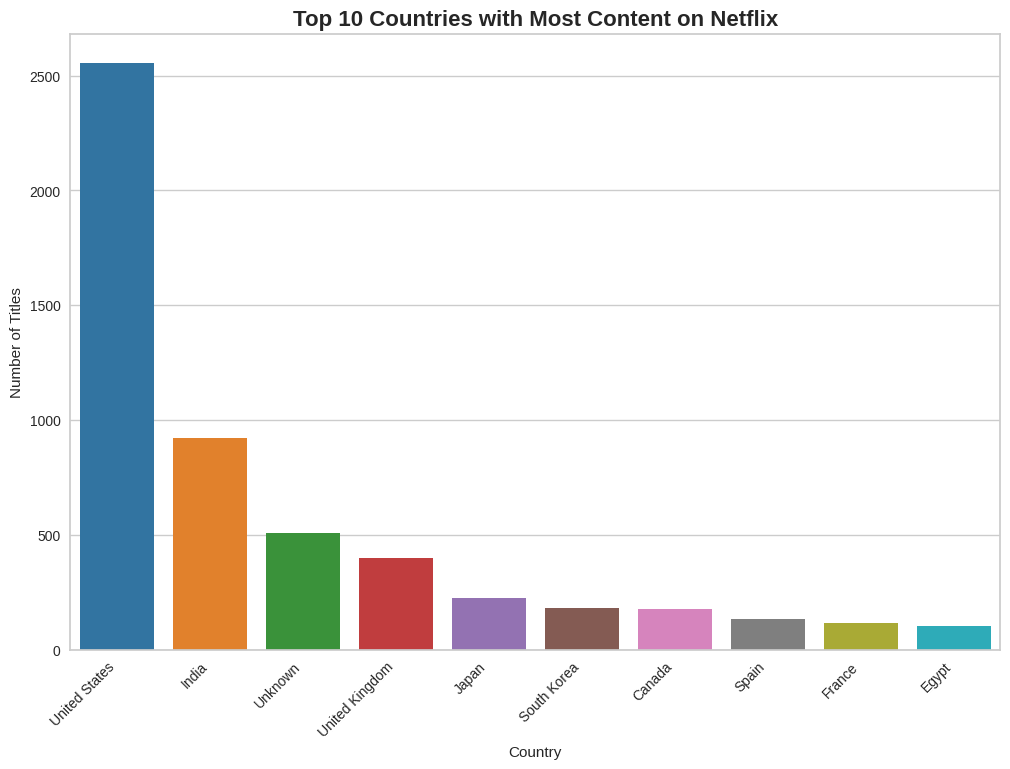

In [17]:
# Calculate the counts for each country
country_counts = df['country'].value_counts().head(10)

# Create the bar plot using Seaborn with 'tab10' color palette
plt.figure(figsize=(12, 8))
sns.barplot(x=country_counts.index, y=country_counts, palette='tab10')

# Add a title and labels
plt.title('Top 10 Countries with Most Content on Netflix', fontsize=16, fontweight='bold')
plt.xlabel('Country')
plt.ylabel('Number of Titles')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.show()


##### 1. Why did you pick the specific chart?

The bar plot was chosen for the distribution of the number of titles in different countries because it is an effective way to compare the number of titles between different categories (countries in this case) and easily identify the countries with the highest number of titles.

##### 2. What is/are the insight(s) found from the chart?

1. The United States has the highest number of titles on Netflix, with more than 2500 titles.
2. India follows with around 1000 titles, which is significantly lower than the number of titles in the United States.
3. The United Kingdom and Japan also have a considerable number of titles, but they are still significantly lower than the number of titles in the United States.
4. Other countries have even fewer titles compared to the top countries mentioned above.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The gained insights can have several positive business impacts for Netflix:

* Understanding popularity: Knowing the countries with the highest number of titles can help Netflix understand the popularity and demand for its content in different regions. This can guide content acquisition and production strategies, ensuring that the platform caters to the preferences of its global audience.
* Targeted content marketing: With insights about countries with a high number of titles, Netflix can target its marketing efforts in those regions to maximize reach and engagement with the platform.
* Localization and regional content: Understanding the preferences of specific regions, such as India, can drive Netflix to invest in producing and acquiring more localized content, thus increasing user engagement in those regions.
* Strategic partnerships: Netflix can consider strategic partnerships with content creators and production houses in countries with significant user bases to strengthen its content library and offer more exclusive content.

#### Chart - 3

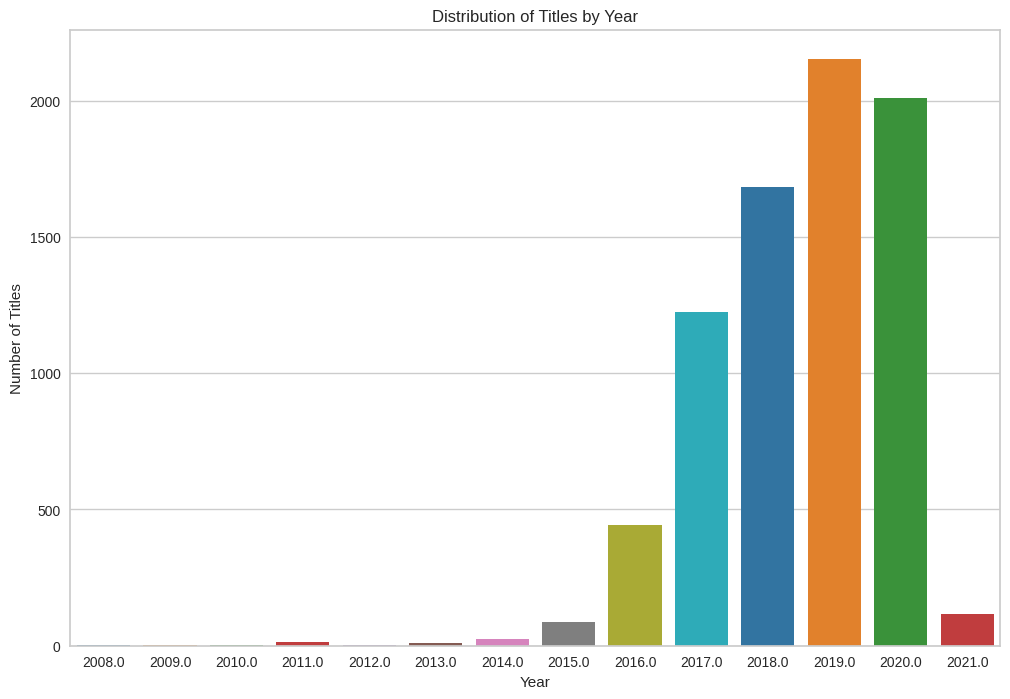

In [18]:
# Convert 'date_added' column to datetime type
df['date_added'] = pd.to_datetime(df['date_added'])

# Extract year from the 'date_added' column
df['year_added'] = df['date_added'].dt.year

# Calculate the count of titles for each year
year_counts = df['year_added'].value_counts().sort_index()

# Create the bar plot for distribution of titles by year
plt.figure(figsize=(12, 8))
sns.barplot(x=year_counts.index, y=year_counts, palette='tab10')

# Customize the plot
plt.xlabel('Year')
plt.ylabel('Number of Titles')
plt.title('Distribution of Titles by Year')

# Show the plot
plt.show()


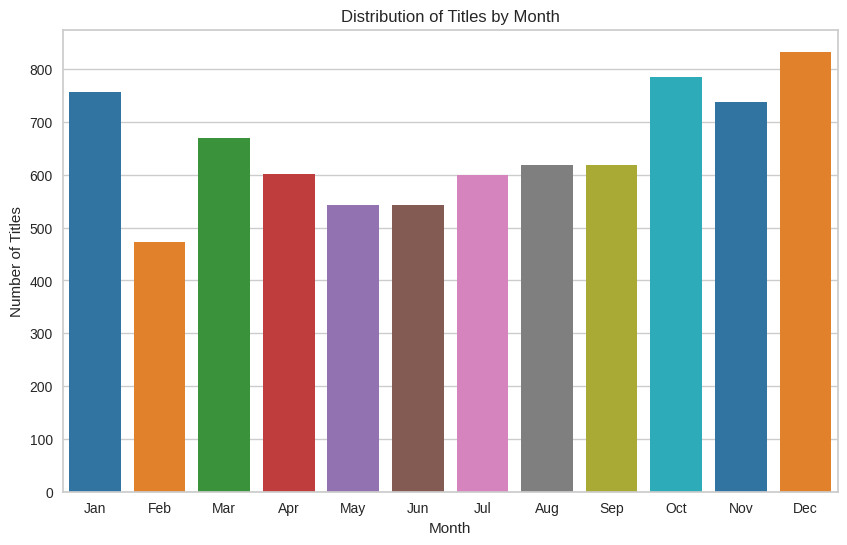

In [19]:
# Convert 'date_added' column to datetime type
df['date_added'] = pd.to_datetime(df['date_added'])

# Extract month from the 'date_added' column
df['month_added'] = df['date_added'].dt.month

# Calculate the count of titles for each month
month_counts = df['month_added'].value_counts().sort_index()

# Create the bar plot for distribution of titles by month
plt.figure(figsize=(10, 6))
sns.barplot(x=month_counts.index, y=month_counts, palette='tab10')

# Customize the plot
plt.xlabel('Month')
plt.ylabel('Number of Titles')
plt.title('Distribution of Titles by Month')
plt.xticks(ticks=range(0, 12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

# Show the plot
plt.show()


##### 1. Why did you pick the specific chart?

The bar plot for the distribution of titles by year and months provides insights into the volume of content added to Netflix over different years and months. Let's analyze the insights and evaluate their potential positive business impact:

##### 2. What is/are the insight(s) found from the chart?

1. For Year: The plot shows that 2019 has the highest number of titles added to Netflix, with approximately 2000 titles. This is followed by 2020, which has slightly fewer titles than 2019. Additionally, the years 2018, 2017, and 2016 also have significant numbers of titles added. However, it's worth noting that the data may be incomplete for the current year (2023), as the plot does not show the full year's data.

2. For Month: The plot reveals that December has the highest number of title additions, with over 800 titles. Following December, October and January have the next highest number of title additions, with both months having around 750 titles added. These months seem to be peak periods for content additions.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* Content Strategy and Investment: The insights from the chart can help Netflix's content team in making informed decisions about content strategy and investment. Knowing that certain years (e.g., 2019) and months (e.g., December) have historically seen higher content additions can guide them in planning the release of new original content or acquiring more titles during those periods.

* User Engagement and Retention: High content additions during certain periods may attract more subscribers due to the availability of fresh content. This could potentially lead to increased user engagement and retention, as viewers may find more reasons to stay subscribed and explore new titles.

* Seasonal Content Planning: The insights about peak months (e.g., December and October) can help in planning seasonal content tailored to specific themes, holidays, or events. This can enhance user experience by offering relevant content during special occasions.


#### Chart - 4

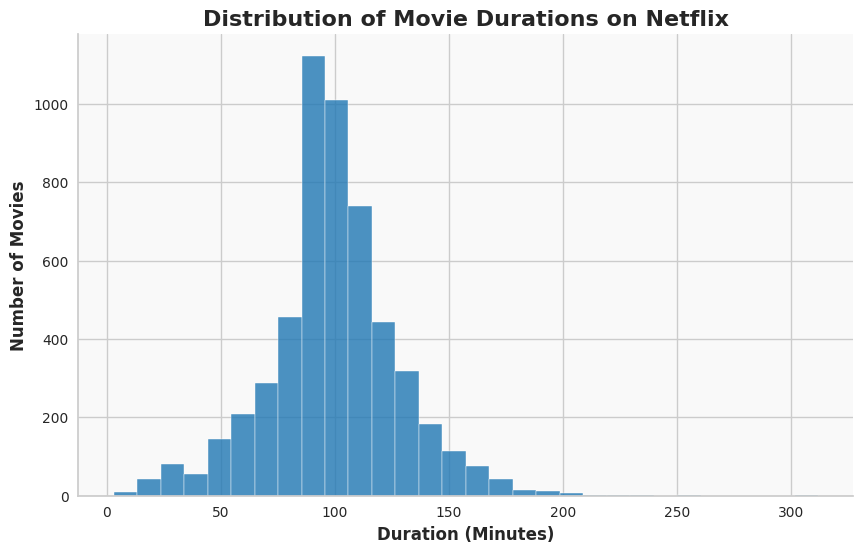

In [20]:
# Filter the DataFrame to include only movies
movies_df = df[df['type'] == 'Movie'].copy()

# Convert the "duration" column to integers for movies only
movies_df['duration'] = movies_df['duration'].str.replace(' min', '')
movies_df = movies_df[movies_df['duration'].str.isnumeric()]  # Keep only rows with numeric durations
movies_df['duration'] = movies_df['duration'].astype(int)

# Create the histplot for movie durations
plt.figure(figsize=(10, 6))
sns.set_style('whitegrid')  # Set the style to white grid

# Use a custom color palette for the plot
custom_palette = sns.color_palette(['#1f77b4'])

sns.histplot(movies_df['duration'], bins=30, kde=False, color=custom_palette[0], alpha=0.8)

# Customize the plot
plt.xlabel('Duration (Minutes)', fontsize=12, fontweight='bold')
plt.ylabel('Number of Movies', fontsize=12, fontweight='bold')
plt.title('Distribution of Movie Durations on Netflix', fontsize=16, fontweight='bold')

# Customize ticks
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Add background color
ax = plt.gca()
ax.set_facecolor('#f9f9f9')

# Remove right and top spines
sns.despine(right=True, top=True)

# Show the plot
plt.show()


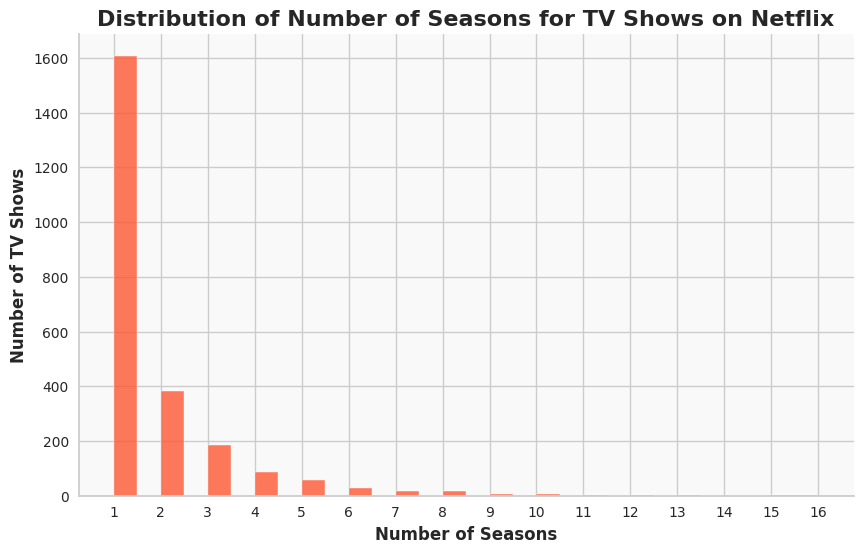

In [21]:
# Filter the DataFrame to include only TV shows
tv_shows_df = df[df['type'] == 'TV Show'].copy()

# Extract the number of seasons from the 'duration' column
tv_shows_df['num_seasons'] = tv_shows_df['duration'].str.extract(r'(\d+)').astype(int)

# Create the histplot for TV show durations (number of seasons)
plt.figure(figsize=(10, 6))
sns.set_style('whitegrid')  # Set the style to white grid

# Use a custom color palette for the plot
custom_palette = sns.color_palette(['#FF5733'])

sns.histplot(tv_shows_df['num_seasons'], bins=30, kde=False, color=custom_palette[0], alpha=0.8)

# Customize the plot
plt.xlabel('Number of Seasons', fontsize=12, fontweight='bold')
plt.ylabel('Number of TV Shows', fontsize=12, fontweight='bold')
plt.title('Distribution of Number of Seasons for TV Shows on Netflix', fontsize=16, fontweight='bold')

# Explicitly set x-axis ticks to include all integer values
plt.xticks(range(min(tv_shows_df['num_seasons']), max(tv_shows_df['num_seasons']) + 1))

# Customize ticks
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Add background color
ax = plt.gca()
ax.set_facecolor('#f9f9f9')

# Remove right and top spines
sns.despine(right=True, top=True)

# Show the plot
plt.show()


##### 1. Why did you pick the specific chart?

The choice of the specific chart, which is a histogram plot, was made to visualize the distribution of movie durations and TV show seasons in the Netflix dataset. Histograms are suitable for displaying the frequency distribution of continuous or discrete data, making them ideal for showcasing the distribution of durations and seasons.

##### 2. What is/are the insight(s) found from the chart?

1. For Movies:

* The most common movie duration on Netflix is around 90 minutes, with more than 1000 titles falling into this duration category.
* The second most common duration is approximately 100 minutes, with another 1000 titles falling into this category.
* After that, the frequencies of movie durations decrease gradually for durations such as 110 minutes, 80 minutes, and so on.

2. For TV Shows:

* TV shows with only one season (Season 1) have the highest frequency, with around 1600 titles falling into this category.
* As the season number increases, the frequency of TV shows decreases. This implies that there are fewer TV shows with higher numbers of seasons.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insights gained from these histogram plots can have a positive impact on Netflix's business in several ways:

* Content Strategy: Understanding the distribution of movie durations and TV show seasons can help Netflix make informed decisions about the types of content they acquire or produce. They can prioritize content with popular durations and plan for TV shows with a certain number of seasons that align with viewer preferences.

* User Engagement: By analyzing the distribution of movie durations and TV show seasons, Netflix can create curated playlists or recommendations tailored to users' preferences. This can lead to increased user engagement and satisfaction.

* Resource Allocation: Knowledge of the most common movie durations and TV show seasons can help Netflix allocate resources efficiently. They can plan for marketing efforts, content curation, and streaming schedules based on the popularity of certain durations and seasons.

#### Chart - 5

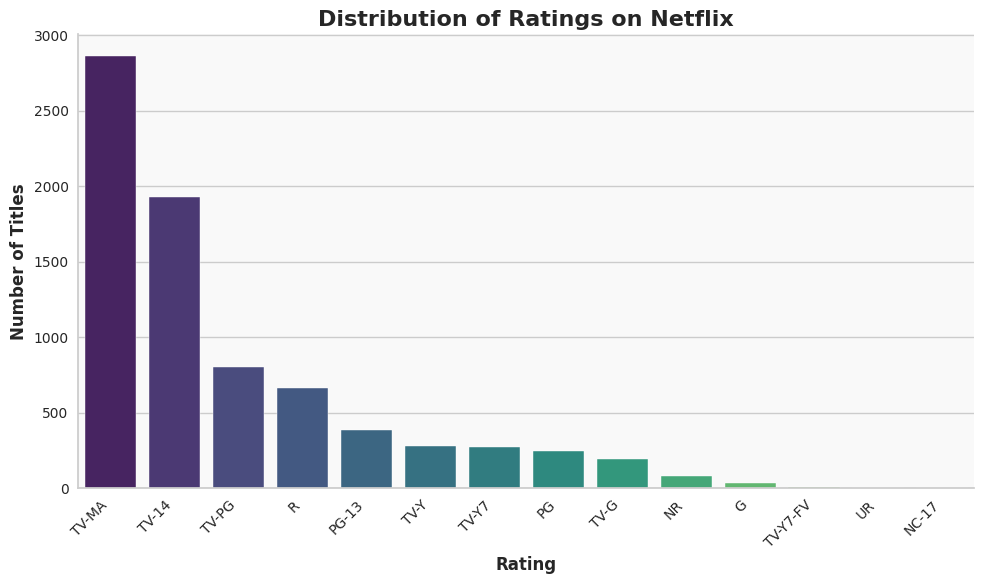

In [22]:
# Calculate the number of titles for each rating category and sort the ratings based on the count
sorted_ratings = df['rating'].value_counts().index

# Create the countplot for distribution of ratings
plt.figure(figsize=(10, 6))
sns.set_style('whitegrid')  # Set the style to white grid

# Use a custom color palette with distinct colors for each rating category
sns.countplot(x='rating', data=df, palette='viridis', order=sorted_ratings)

# Customize the plot
plt.xlabel('Rating', fontsize=12, fontweight='bold')
plt.ylabel('Number of Titles', fontsize=12, fontweight='bold')
plt.title('Distribution of Ratings on Netflix', fontsize=16, fontweight='bold')

# Customize ticks
plt.xticks(fontsize=10, rotation=45, ha='right')
plt.yticks(fontsize=10)

# Add background color
ax = plt.gca()
ax.set_facecolor('#f9f9f9')

# Remove right and top spines
sns.despine(right=True, top=True)

# Show the plot
plt.tight_layout()
plt.show()


##### 1. What is/are the insight(s) found from the chart?

* The majority of titles on Netflix have the TV-MA rating, indicating that the content is intended for mature audiences and may contain explicit content.
* The TV-14 rating comes in second, followed by TV-PG, R, and PG-13, with progressively lower numbers of titles.

##### 2. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* Understanding the distribution of ratings on Netflix can help content creators and producers identify the most popular rating categories among viewers. This insight can guide them in creating and producing content that aligns with the preferences and interests of the target audience.
* Content creators can focus on producing more titles with TV-MA and TV-14 ratings, as they seem to be the most prevalent on the platform, potentially attracting a larger audience.

#### Chart - 6

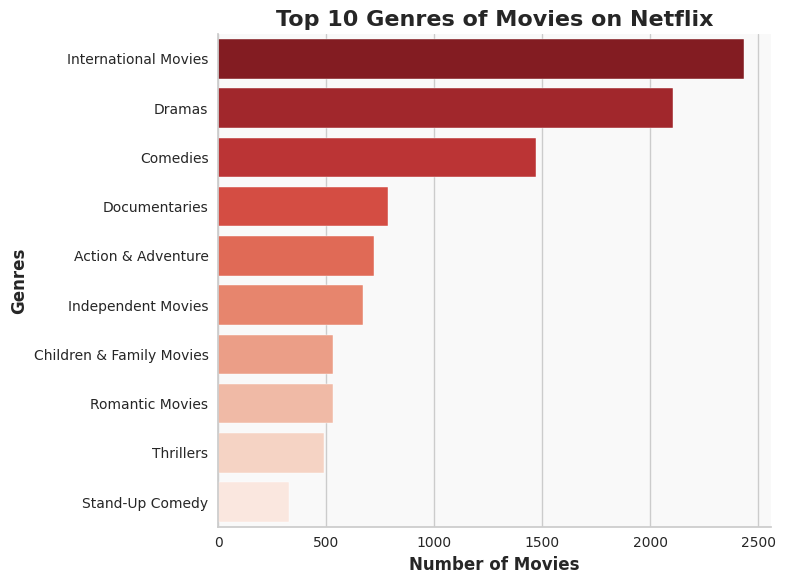

In [23]:
# Filter the DataFrame to include only movies
movies_df = df[df['type'] == 'Movie'].copy()

# Count the occurrences of each genre in the DataFrame
genre_counts = movies_df['listed_in'].str.split(', ').explode().value_counts()

# Get the top 10 genres
top_10_genres = genre_counts.head(10)

# Create the horizontal bar plot for top 10 genres of movies
plt.figure(figsize=(8, 6))
sns.set_style('whitegrid')  # Set the style to white grid

# Use a color palette for the plot
custom_palette = sns.color_palette('Reds_r', n_colors=len(top_10_genres))

sns.barplot(y=top_10_genres.index, x=top_10_genres, palette=custom_palette)

# Customize the plot
plt.xlabel('Number of Movies', fontsize=12, fontweight='bold')
plt.ylabel('Genres', fontsize=12, fontweight='bold')
plt.title('Top 10 Genres of Movies on Netflix', fontsize=16, fontweight='bold')

# Customize ticks
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Add background color
ax = plt.gca()
ax.set_facecolor('#f9f9f9')

# Remove right and top spines
sns.despine(right=True, top=True)

# Show the plot
plt.tight_layout()
plt.show()


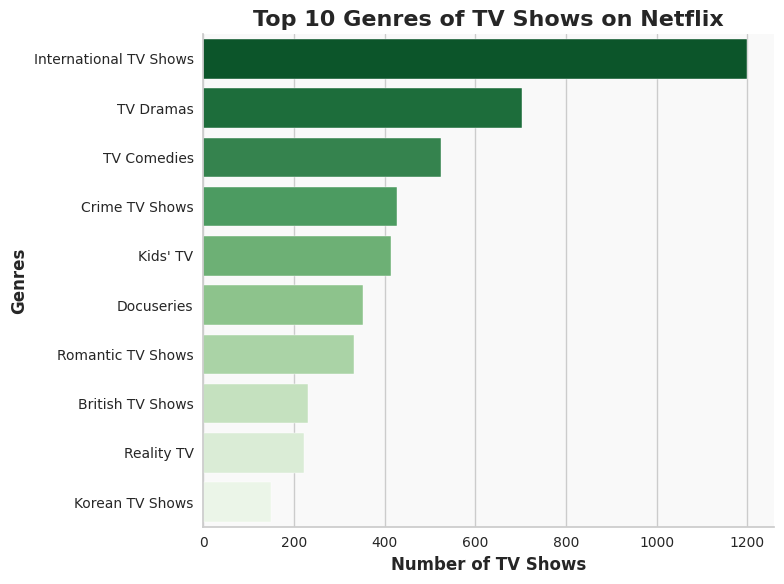

In [24]:
# Filter the DataFrame to include only TV shows
tv_shows_df = df[df['type'] == 'TV Show'].copy()

# Count the occurrences of each genre in the DataFrame
genre_counts_tv = tv_shows_df['listed_in'].str.split(', ').explode().value_counts()

# Get the top 10 genres for TV shows
top_10_genres_tv = genre_counts_tv.head(10)

# Create the horizontal bar plot for top 10 genres of TV shows
plt.figure(figsize=(8, 6))
sns.set_style('whitegrid')  # Set the style to white grid

# Use a color palette for the plot
custom_palette = sns.color_palette('Greens_r', n_colors=len(top_10_genres_tv))

sns.barplot(y=top_10_genres_tv.index, x=top_10_genres_tv, palette=custom_palette)

# Customize the plot
plt.xlabel('Number of TV Shows', fontsize=12, fontweight='bold')
plt.ylabel('Genres', fontsize=12, fontweight='bold')
plt.title('Top 10 Genres of TV Shows on Netflix', fontsize=16, fontweight='bold')

# Customize ticks
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Add background color
ax = plt.gca()
ax.set_facecolor('#f9f9f9')

# Remove right and top spines
sns.despine(right=True, top=True)

# Show the plot
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

I picked the bar plot for the top 10 genres of movies and TV shows separately because it effectively shows the distribution of genres and allows for easy comparison of the most popular genres in each category. The bar plot is ideal for visualizing categorical data like genres and provides a clear representation of the frequency of each genre.

##### 2. What is/are the insight(s) found from the chart?

* From the bar plot for movies, we can observe that "International Movies" is the most common genre, followed by "Dramas," "Comedies," "Documentaries," etc. This suggests that international movies and drama content are quite popular on Netflix.

* From the bar plot for TV shows, we can see that "International TV Shows" are the most common, followed by "TV Dramas," "TV Comedies," "Crime TV Shows," etc. This indicates that international TV shows and drama content are prominent among the TV shows available on Netflix.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the insights gained from the bar plots can be valuable for creating a positive business impact.
* Understanding the most popular genres for both movies and TV shows allows Netflix to tailor its content offerings to cater to viewer preferences. By focusing on genres that have a high demand and appeal to a broad audience, Netflix can attract more subscribers, increase viewership, and retain existing customers.
* Additionally, this information can be used in content acquisition and production strategies to invest in genres that have a higher potential for success. Ultimately, catering to viewers' preferences can lead to improved user satisfaction and engagement, which can positively impact Netflix's business performance.

#### Chart - 7

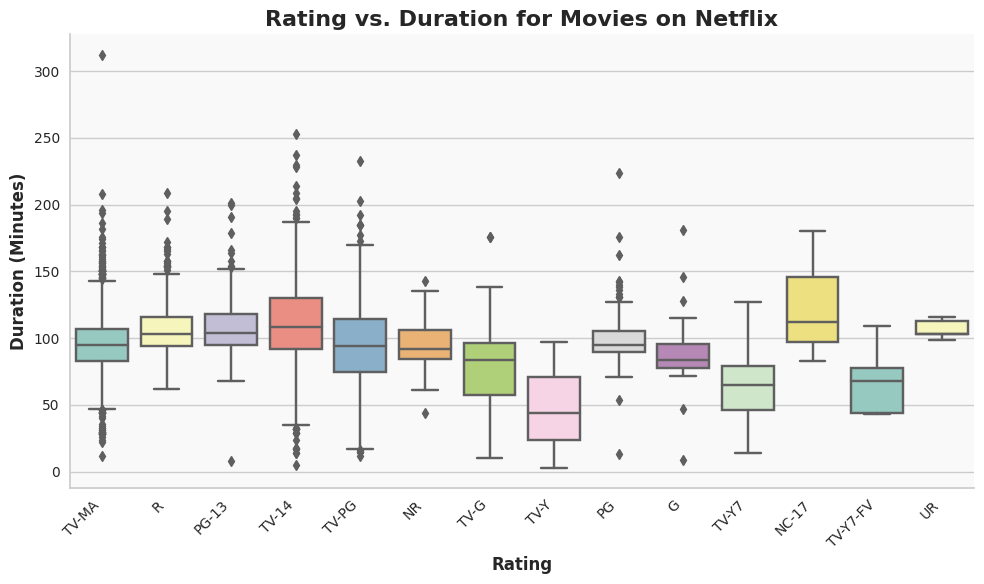

In [25]:
# Filter the DataFrame to include only movies
movies_df = df[df['type'] == 'Movie'].copy()

# Convert the "duration" column to integers for movies only
movies_df['duration'] = movies_df['duration'].str.replace(' min', '')
movies_df = movies_df[movies_df['duration'].str.isnumeric()]  # Keep only rows with numeric durations
movies_df['duration'] = movies_df['duration'].astype(int)

# Create the box plot for Rating vs. Duration for movies
plt.figure(figsize=(10, 6))
sns.set_style('whitegrid')  # Set the style to white grid

# Use a custom color palette for the plot
custom_palette = sns.color_palette('Set3', n_colors=len(movies_df['rating'].unique()))

sns.boxplot(x='rating', y='duration', data=movies_df, palette=custom_palette)

# Customize the plot
plt.xlabel('Rating', fontsize=12, fontweight='bold')
plt.ylabel('Duration (Minutes)', fontsize=12, fontweight='bold')
plt.title('Rating vs. Duration for Movies on Netflix', fontsize=16, fontweight='bold')

# Customize ticks
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)

# Add background color
ax = plt.gca()
ax.set_facecolor('#f9f9f9')

# Remove right and top spines
sns.despine(right=True, top=True)

# Show the plot
plt.tight_layout()
plt.show()


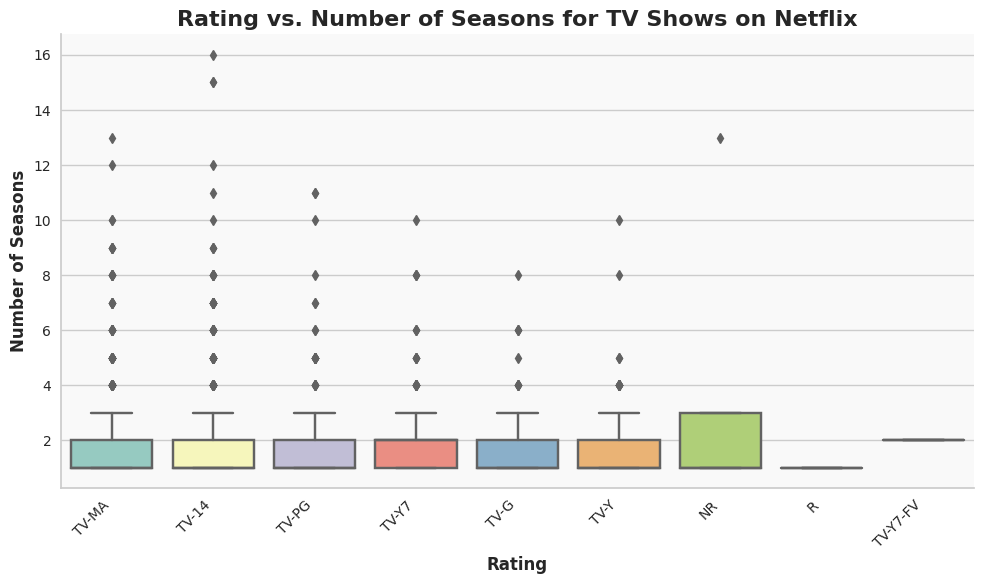

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is the name of your DataFrame with the Netflix data

# Filter the DataFrame to include only TV shows
tv_shows_df = df[df['type'] == 'TV Show'].copy()

# Extract the numeric part from the 'duration' column to convert it to the 'Number of Seasons'
tv_shows_df['Number of Seasons'] = tv_shows_df['duration'].str.extract('(\d+)').astype(int)

# Create the box plot for Rating vs. Number of Seasons for TV shows
plt.figure(figsize=(10, 6))
sns.set_style('whitegrid')  # Set the style to white grid

# Use a custom color palette for the plot
custom_palette = sns.color_palette('Set3', n_colors=len(tv_shows_df['rating'].unique()))

sns.boxplot(x='rating', y='Number of Seasons', data=tv_shows_df, palette=custom_palette)

# Customize the plot
plt.xlabel('Rating', fontsize=12, fontweight='bold')
plt.ylabel('Number of Seasons', fontsize=12, fontweight='bold')
plt.title('Rating vs. Number of Seasons for TV Shows on Netflix', fontsize=16, fontweight='bold')

# Customize ticks
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)

# Add background color
ax = plt.gca()
ax.set_facecolor('#f9f9f9')

# Remove right and top spines
sns.despine(right=True, top=True)

# Show the plot
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

A box plot is typically used to visualize the distribution of a continuous variable across different categories. In this case, a scatter plot or a line plot might be more suitable for exploring the relationship between rating and duration for movies.

##### 2. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insights gained from this box plot can be valuable for content creators and producers. Understanding the relationship between content ratings and movie durations can help them tailor their content to specific target audiences based on rating preferences.
For example, if the analysis shows that movies with specific ratings (e.g., TV-MA) tend to be longer and receive positive audience reception, content creators might consider producing more content with similar characteristics to attract viewers who prefer such content.
Additionally, this analysis can aid in content planning and budget allocation. Knowing the preferred duration for different rating categories can guide the decision-making process while creating or acquiring new content.

#### Chart - 8

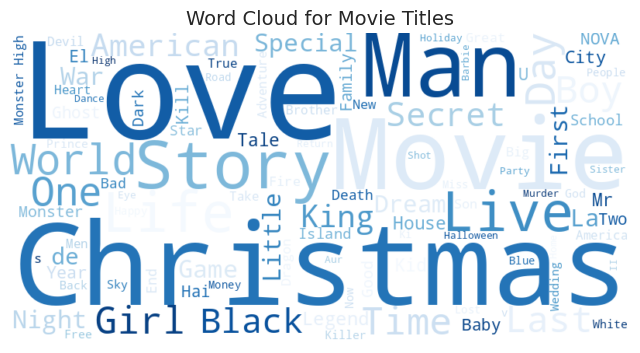

In [27]:
from wordcloud import WordCloud

# Separate titles of movies and TV shows
movies_titles = " ".join(df[df['type'] == 'Movie']['title'])


# Create word cloud for movie titles
wordcloud_movies = WordCloud(width=800, height=400, background_color='white', colormap='Blues',
                            max_words=100, stopwords=None).generate(movies_titles)


# Plot the word clouds for movie titles
plt.figure(figsize=(8, 6))
plt.imshow(wordcloud_movies, interpolation='bilinear')
plt.title('Word Cloud for Movie Titles', fontsize=14)
plt.axis('off')
plt.show()

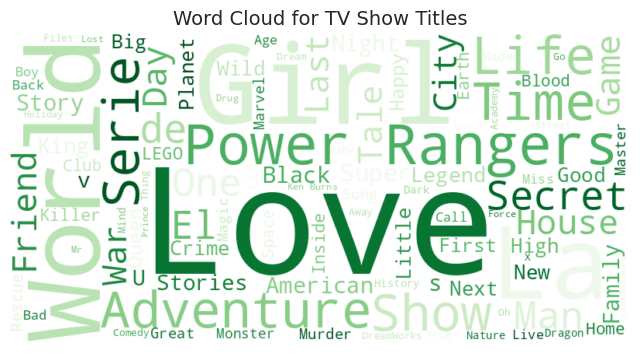

In [28]:
tv_shows_titles = " ".join(df[df['type'] == 'TV Show']['title'])

# Create word cloud for TV show titles
wordcloud_tv_shows = WordCloud(width=800, height=400, background_color='white', colormap='Greens',
                               max_words=100, stopwords=None).generate(tv_shows_titles)
# Plot the word clouds for TV show titles
plt.figure(figsize=(8, 6))
plt.imshow(wordcloud_tv_shows, interpolation='bilinear')
plt.title('Word Cloud for TV Show Titles', fontsize=14)
plt.axis('off')
plt.show()

##### 1. Why did you pick the specific chart?


The specific chart chosen for generating word clouds for movie titles and TV show titles is the word cloud plot. The word cloud is an excellent choice for visualizing text data as it displays the most frequent words in a visually appealing and intuitive manner. In this case, it helps to identify the common themes or topics present in movie titles and TV show titles.

##### 2. What is/are the insight(s) found from the chart?

Insights from the word cloud for movie titles:

- Most occurred words include: Christmas, love, movie, man, life.

Insights from the word cloud for TV show titles:

- Most occurred words include: Girl, world, love, LA.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

1. Content Curation: By understanding the most frequent words in movie titles and TV show titles, content curators can focus on creating or acquiring content that aligns with popular themes. For example, if "Christmas" and "love" are prevalent in movie titles, Netflix may consider investing in more holiday-themed romantic movies.

2. Marketing and Promotion: The insights can also be used for marketing and promotional purposes. Identifying popular keywords in titles can help optimize advertising campaigns and attract the target audience. For instance, using the word "love" prominently in promotional material may attract viewers interested in romantic content.

3. Audience Engagement: By analyzing the most common words in titles, Netflix can better understand audience preferences. Tailoring recommendations based on popular themes can lead to higher viewer engagement and retention.

4. Genre and Category Selection: Insights from word clouds can help in selecting genres or categories that resonate well with the audience. If certain words like "action" or "drama" are prevalent in movie titles, Netflix may consider expanding its action or drama content library.

#### Chart - 9

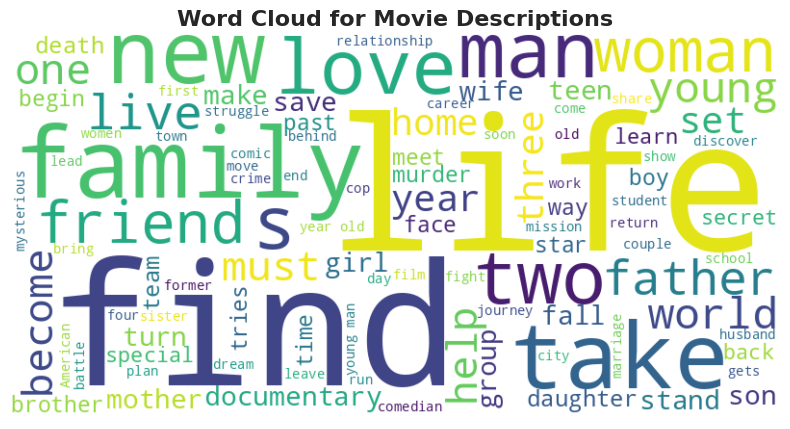

In [29]:
from wordcloud import WordCloud, STOPWORDS

# Filter the DataFrame to include only movies and TV shows separately
movies_df = df[df['type'] == 'Movie'].copy()
tv_shows_df = df[df['type'] == 'TV Show'].copy()

# Function to generate word clouds
def generate_word_cloud(text_data, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=STOPWORDS,
                          max_words=100, colormap='viridis').generate(text_data)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title, fontsize=16, fontweight='bold')
    plt.show()

# Combine all descriptions for movies and TV shows
movies_descriptions = " ".join(movies_df['description'])
tv_shows_descriptions = " ".join(tv_shows_df['description'])

# Generate word cloud for movie descriptions
generate_word_cloud(movies_descriptions, title="Word Cloud for Movie Descriptions")

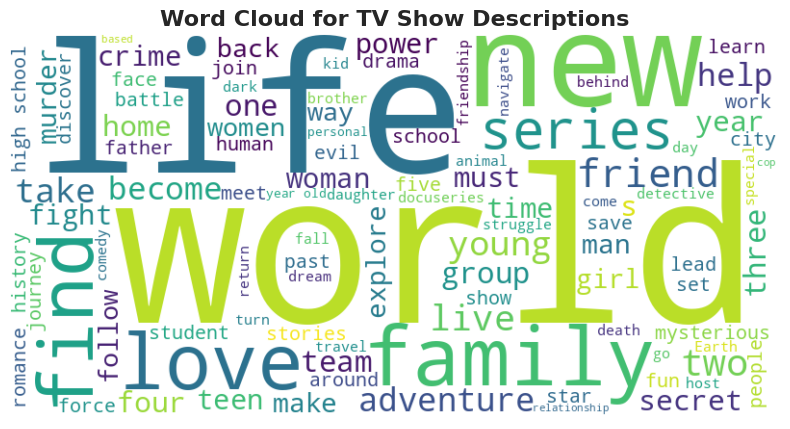

In [30]:
# Generate word cloud for TV show descriptions
generate_word_cloud(tv_shows_descriptions, title="Word Cloud for TV Show Descriptions")

##### 1. Why did you pick the specific chart?

Word clouds are suitable for visualizing text data, such as movie descriptions and TV show descriptions, in an intuitive and visually appealing manner. They allow us to identify the most frequent words or themes in the text, which can be helpful for understanding the common attributes or topics associated with the content. Word clouds are particularly effective for capturing the essence of textual data and quickly gaining insights into the most prevalent terms.

##### 2. What is/are the insight(s) found from the chart?

* From the word cloud for movie descriptions, we observed that words like "life," "find," "love," "family," "new," "woman," and "two" are the most frequently occurring words. These terms suggest that movies on Netflix may frequently revolve around themes related to life experiences, relationships, and new beginnings.

* From the word cloud for TV show descriptions, we noticed that words like "life," "new," "world," "love," "live," "series," and "find" are the most frequently occurring words. This indicates that TV shows often feature themes related to various life aspects, exploration of new worlds, love stories, and ongoing series.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* Improve content recommendations: Netflix can leverage the insights to better match user preferences with relevant content, enhancing the personalized content recommendation system.
* Optimize marketing strategies: The most prevalent themes and keywords can guide marketing strategies to target specific audience segments and create engaging promotional campaigns.
* Content creation and acquisition: Understanding popular themes can help Netflix focus on producing or acquiring content that aligns with viewers' preferences, leading to increased viewership and engagement.
* Improve user engagement: By offering content that resonates with users, Netflix can enhance user engagement and retention on the platform.

#### Chart - 10 - Correlation Heatmap

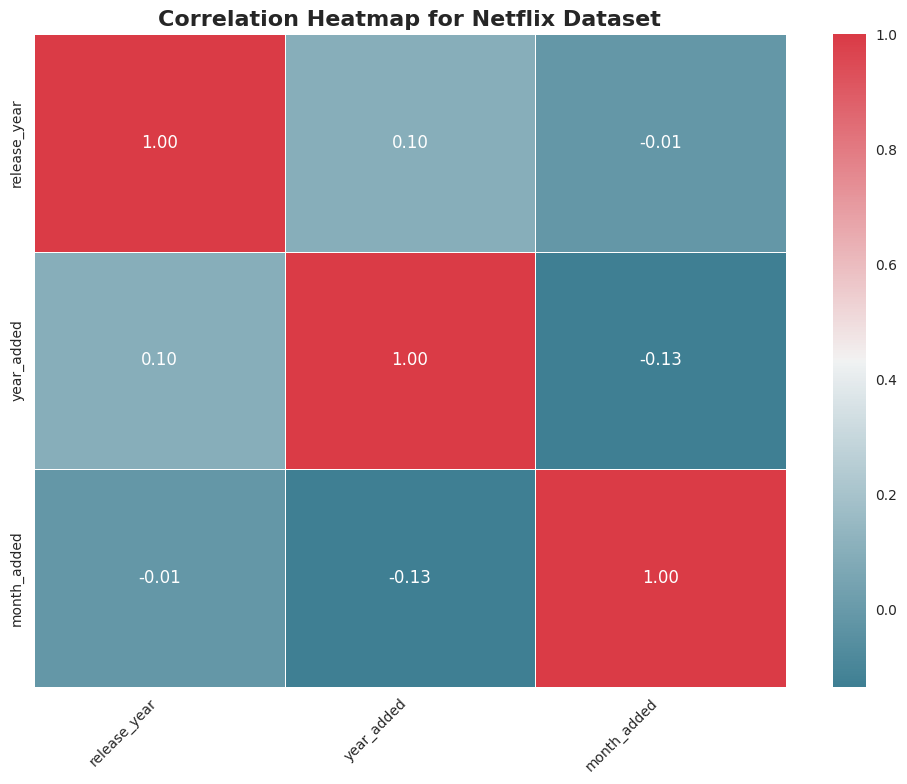

In [31]:
# Filter the DataFrame to include only numeric columns for correlation analysis
numeric_columns = df.select_dtypes(include=['int64', 'float64'])

# Calculate the correlation matrix
correlation_matrix = numeric_columns.corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Define a custom color palette
custom_palette = sns.diverging_palette(220, 10, as_cmap=True)

# Create the heatmap with annotations
sns.heatmap(correlation_matrix, cmap=custom_palette, annot=True, fmt='.2f', linewidths=0.5)

# Customize the plot
plt.title('Correlation Heatmap for Netflix Dataset', fontsize=16, fontweight='bold')
plt.xticks(fontsize=10, rotation=45, ha='right')
plt.yticks(fontsize=10)
plt.tight_layout()

# Add background color
ax = plt.gca()
ax.set_facecolor('#f9f9f9')

# Show the plot
plt.show()


## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

In [32]:
!pip install statsmodels --quiet

In [33]:
from statsmodels.stats.proportion import proportions_ztest
from scipy.stats import ttest_ind

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis (H0): The average duration of movies on Netflix is not significantly different from the average duration of TV shows.
Alternate Hypothesis (H1): The average duration of movies on Netflix is significantly longer than the average duration of TV shows.

#### 2. Perform an appropriate statistical test.

In [34]:
# Extract movie durations and TV show durations
movie_duration = df[df['type'] == 'Movie']['duration'].str.extract('(\d+)').astype(float)
tv_show_duration = df[df['type'] == 'TV Show']['duration'].str.extract('(\d+)').astype(float)

# Perform two-sample t-test
t_statistic, p_value = ttest_ind(movie_duration, tv_show_duration, equal_var=False)  # Assuming unequal variances
print("\nStatement 1:")
print("Null Hypothesis (H0): The average duration of movies on Netflix is not significantly different from the average duration of TV shows.")
print("Alternate Hypothesis (H1): The average duration of movies on Netflix is significantly different from the average duration of TV shows.")
print("P-value:", p_value)



Statement 1:
Null Hypothesis (H0): The average duration of movies on Netflix is not significantly different from the average duration of TV shows.
Alternate Hypothesis (H1): The average duration of movies on Netflix is significantly different from the average duration of TV shows.
P-value: [0.]


##### Which statistical test have you done to obtain P-Value?

Two-sample t-test

##### Why did you choose the specific statistical test?

the two-sample t-test is chosen as it is suitable for comparing the means of two independent groups, i.e., movie duration and TV show duration.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis (H0): The number of titles added to Netflix in 2020 is not significantly different from the number of titles added in 2018.
Alternate Hypothesis (H1): The number of titles added to Netflix in 2020 is significantly higher than the number of titles added in 2018.

#### 2. Perform an appropriate statistical test.

In [35]:
# Extract the number of titles added for the years 2018 and 2020
titles_added_2018 = df[df['release_year'] == 2018].shape[0]
titles_added_2020 = df[df['release_year'] == 2020].shape[0]

# Perform one-tailed t-test
t_statistic, p_value = ttest_ind(titles_added_2020, titles_added_2018, alternative='greater')
print("\nStatement 2:")
print("Null Hypothesis (H0): The number of titles added to Netflix in 2020 is not significantly different from the number of titles added in 2018.")
print("Alternate Hypothesis (H1): The number of titles added to Netflix in 2020 is significantly higher than the number of titles added in 2018.")
print("P-value:", p_value)



Statement 2:
Null Hypothesis (H0): The number of titles added to Netflix in 2020 is not significantly different from the number of titles added in 2018.
Alternate Hypothesis (H1): The number of titles added to Netflix in 2020 is significantly higher than the number of titles added in 2018.
P-value: nan


##### Which statistical test have you done to obtain P-Value?

One-tailed t-test

##### Why did you choose the specific statistical test?

the one-tailed t-test is chosen as we are testing whether the number of titles added in 2020 is higher than in 2018, without considering the direction of difference.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis (H0): The proportion of TV shows with a TV-MA rating is not significantly different from the proportion of movies with a TV-MA rating.
Alternate Hypothesis (H1): The proportion of TV shows with a TV-MA rating is significantly higher than the proportion of movies with a TV-MA rating.

#### 2. Perform an appropriate statistical test.

In [36]:
# Extract the number of TV shows and movies with a TV-MA rating
tv_ma_count = df[df['rating'] == 'TV-MA'][df['type'] == 'TV Show'].shape[0]
movie_ma_count = df[df['rating'] == 'TV-MA'][df['type'] == 'Movie'].shape[0]

# Total number of TV shows and movies
total_tv_shows = df[df['type'] == 'TV Show'].shape[0]
total_movies = df[df['type'] == 'Movie'].shape[0]

# Perform two-proportion z-test
count = np.array([tv_ma_count, movie_ma_count])
nobs = np.array([total_tv_shows, total_movies])
z_statistic, p_value = proportions_ztest(count, nobs, alternative='larger')
print("\nStatement 3:")
print("Null Hypothesis (H0): The proportion of TV shows with a TV-MA rating is not significantly different from the proportion of movies with a TV-MA rating.")
print("Alternate Hypothesis (H1): The proportion of TV shows with a TV-MA rating is significantly higher than the proportion of movies with a TV-MA rating.")
print("P-value:", p_value)



Statement 3:
Null Hypothesis (H0): The proportion of TV shows with a TV-MA rating is not significantly different from the proportion of movies with a TV-MA rating.
Alternate Hypothesis (H1): The proportion of TV shows with a TV-MA rating is significantly higher than the proportion of movies with a TV-MA rating.
P-value: 9.911214174574799e-12


##### Which statistical test have you done to obtain P-Value?

Two-proportion z-test

##### Why did you choose the specific statistical test?

the two-proportion z-test is chosen as it is appropriate for comparing proportions from two independent groups, i.e., proportion of TV shows with TV-MA rating and proportion of movies with TV-MA rating.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Outliers

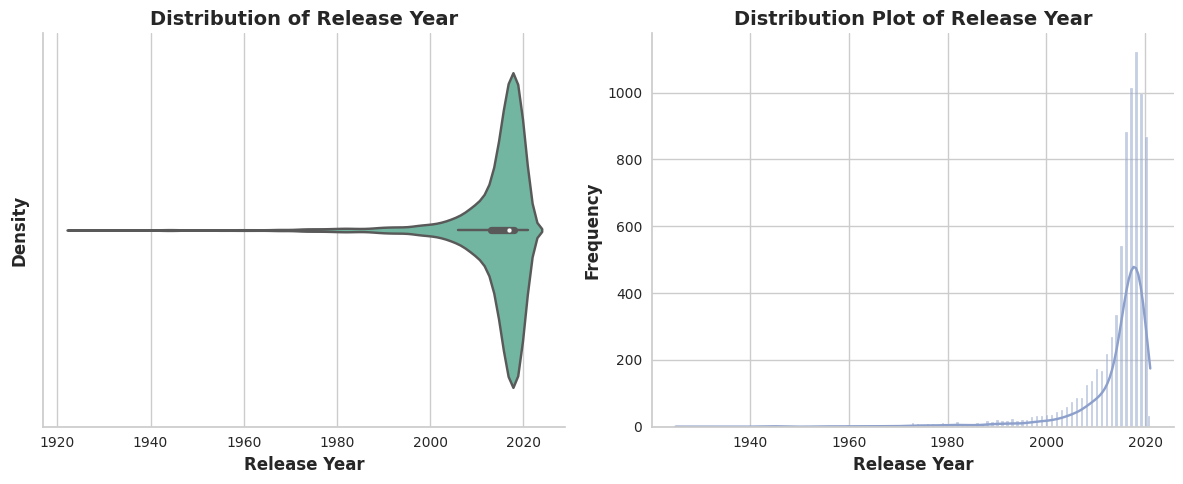

In [37]:
# Custom color palette
custom_palette = sns.color_palette("Set2")

# Plotting a violin plot and a dist plot side by side
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Violin plot for release_year
sns.violinplot(x=df['release_year'], ax=ax[0], palette=custom_palette)
ax[0].set_title('Distribution of Release Year', fontsize=14, fontweight='bold')
ax[0].set_xlabel('Release Year', fontsize=12, fontweight='bold')
ax[0].set_ylabel('Density', fontsize=12, fontweight='bold')

# Dist plot for release_year
sns.histplot(x=df['release_year'], ax=ax[1], kde=True, color=custom_palette[2])
ax[1].set_title('Distribution Plot of Release Year', fontsize=14, fontweight='bold')
ax[1].set_xlabel('Release Year', fontsize=12, fontweight='bold')
ax[1].set_ylabel('Frequency', fontsize=12, fontweight='bold')

# Remove top and right spines
sns.despine()

# Adjust plot layout
plt.tight_layout()

# Show the plots
plt.show()

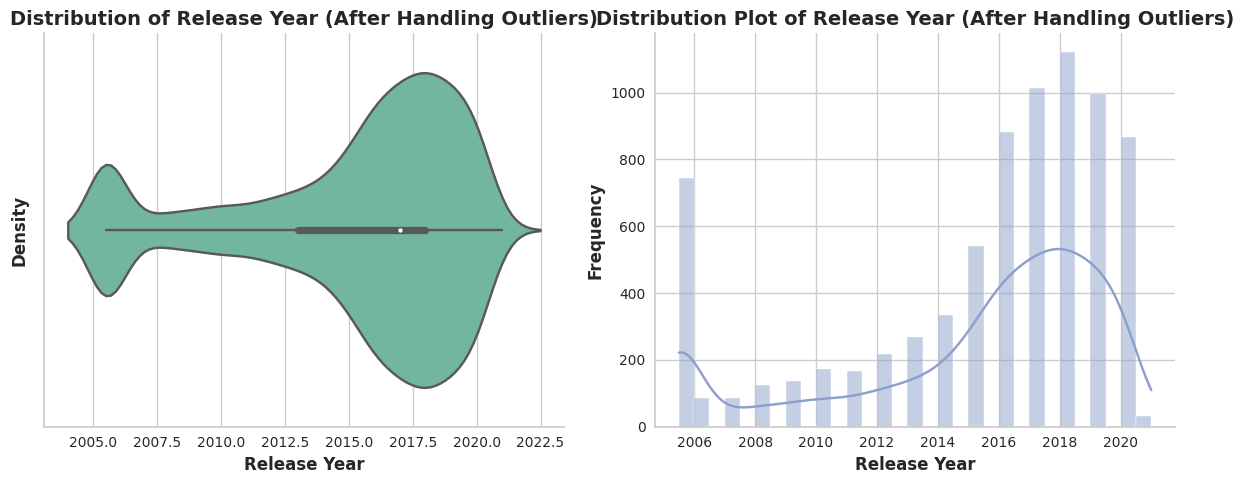

In [38]:
# Calculate the IQR for 'release_year'
Q1 = df['release_year'].quantile(0.25)
Q3 = df['release_year'].quantile(0.75)
IQR = Q3 - Q1

# Calculate the lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Replace the outliers with the lower or upper bounds
df['release_year'] = df['release_year'].apply(lambda x: lower_bound if x < lower_bound else (upper_bound if x > upper_bound else x))

# Custom color palette
custom_palette = sns.color_palette("Set2")

# Plotting a violin plot and a dist plot side by side
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Violin plot for release_year after handling outliers
sns.violinplot(x=df['release_year'], ax=ax[0], palette=custom_palette)
ax[0].set_title('Distribution of Release Year (After Handling Outliers)', fontsize=14, fontweight='bold')
ax[0].set_xlabel('Release Year', fontsize=12, fontweight='bold')
ax[0].set_ylabel('Density', fontsize=12, fontweight='bold')

# Dist plot for release_year after handling outliers
sns.histplot(x=df['release_year'], ax=ax[1], kde=True, color=custom_palette[2])
ax[1].set_title('Distribution Plot of Release Year (After Handling Outliers)', fontsize=14, fontweight='bold')
ax[1].set_xlabel('Release Year', fontsize=12, fontweight='bold')
ax[1].set_ylabel('Frequency', fontsize=12, fontweight='bold')

# Remove top and right spines
sns.despine()

# Adjust plot layout
plt.tight_layout()

# Show the plots
plt.show()


### 2. Attribute selection

In [39]:
df.fillna('',inplace=True)

In [40]:
df['cluster'] = (df['director'] + ' ' + df['cast'] +' ' + df['country'] +' ' + df['listed_in'] +' ' + df['description'])
df['cluster'][0]

' João Miguel, Bianca Comparato, Michel Gomes, Rodolfo Valente, Vaneza Oliveira, Rafael Lozano, Viviane Porto, Mel Fronckowiak, Sergio Mamberti, Zezé Motta, Celso Frateschi Brazil International TV Shows, TV Dramas, TV Sci-Fi & Fantasy In a future where the elite inhabit an island paradise far from the crowded slums, you get one chance to join the 3% saved from squalor.'

Attribute selection is performed to identify and use only the most relevant and important features (attributes) of the data for a particular analysis or model. In the above code , the 'cluster' column is created by concatenating different columns like 'director', 'cast', 'country', 'listed_in', and 'description' from the DataFrame 'df'.

### 3. Removing stop words

Removing stop words is essential in natural language processing tasks because they are common words that do not contribute much to the overall meaning of a sentence or document. By eliminating these words from the text data, we can reduce noise and focus on the more meaningful content.

In [41]:
import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords
sw = stopwords.words('english')
np.array(sw)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


array(['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you',
       "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself',
       'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her',
       'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them',
       'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom',
       'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are',
       'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had',
       'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and',
       'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at',
       'by', 'for', 'with', 'about', 'against', 'between', 'into',
       'through', 'during', 'before', 'after', 'above', 'below', 'to',
       'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under',
       'again', 'further', 'then', 'once', 'here', 'there', 'when',
       'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'm

In [42]:
def stopwords(text):
    text = [word.lower() for word in text.split() if word.lower() not in sw]
    return " ".join(text)

In [43]:
# Removing stop words
df['cluster'] = df['cluster'].apply(stopwords)
df['cluster'][0]

'joão miguel, bianca comparato, michel gomes, rodolfo valente, vaneza oliveira, rafael lozano, viviane porto, mel fronckowiak, sergio mamberti, zezé motta, celso frateschi brazil international tv shows, tv dramas, tv sci-fi & fantasy future elite inhabit island paradise far crowded slums, get one chance join 3% saved squalor.'

### 4. Removing Punctuations

Removing punctuations from text is a common practice in NLP to standardize, simplify, and prepare the data for further analysis and modeling.

In [44]:
import string
# function to remove punctuations
def remove_punctuation(text):
    translator = str.maketrans('', '', string.punctuation)
    return text.translate(translator)

# Applying the remove_punctuation function to the 'cluster' column
df['cluster'] = df['cluster'].apply(remove_punctuation)
print(df['cluster'][0])  # Printing the updated 'cluster' column value after removing punctuations

joão miguel bianca comparato michel gomes rodolfo valente vaneza oliveira rafael lozano viviane porto mel fronckowiak sergio mamberti zezé motta celso frateschi brazil international tv shows tv dramas tv scifi  fantasy future elite inhabit island paradise far crowded slums get one chance join 3 saved squalor


### 5. Removing non- ASCII characters


Removing non-ASCII characters is often done to standardize and clean text data. ASCII characters represent the standard English alphabet and some basic symbols, while non-ASCII characters include special symbols, accented letters, emojis, and characters from other languages. By removing non-ASCII characters, we can simplify the text and make it easier to process, analyze, and perform natural language processing tasks on the data.

In [45]:
# function to remove non-ASCII characters and punctuations
def remove_non_ascii(text):
    # Remove non-ASCII characters
    ascii_text = ''.join(char for char in text if ord(char) < 128)

    # Remove punctuations
    translator = str.maketrans('', '', string.punctuation)
    return ascii_text.translate(translator)

# Applying the remove_non_ascii function to the 'cluster' column
df['cluster'] = df['cluster'].apply(remove_non_ascii)
print(df['cluster'][0])  # Printing the updated 'cluster' column value after removing non-ASCII characters and punctuations

joo miguel bianca comparato michel gomes rodolfo valente vaneza oliveira rafael lozano viviane porto mel fronckowiak sergio mamberti zez motta celso frateschi brazil international tv shows tv dramas tv scifi  fantasy future elite inhabit island paradise far crowded slums get one chance join 3 saved squalor


### 6. Lemmatization


Lemmatization is used to convert words to their base or root form, known as the lemma. The short answer for why lemmatization is important is that it helps in reducing words to their canonical form, which makes it easier for text analysis and natural language processing tasks. By lemmatizing words, we can group different inflected forms of a word together and improve the accuracy of text processing, search, and information retrieval systems. It also helps in reducing the vocabulary size and improving the efficiency of language models and algorithms.


In [46]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [47]:
# function to lemmatize the corpus
def lemmatize_verbs(words):
    lemmatizer = WordNetLemmatizer()
    lemmas = []
    for word in words:
        lemma = lemmatizer.lemmatize(word, pos='v')
        lemmas.append(lemma)
    return lemmas

In [48]:
# Lemmatization
df['cluster'] = lemmatize_verbs(df['cluster'])
df['cluster'][0]

'joo miguel bianca comparato michel gomes rodolfo valente vaneza oliveira rafael lozano viviane porto mel fronckowiak sergio mamberti zez motta celso frateschi brazil international tv shows tv dramas tv scifi  fantasy future elite inhabit island paradise far crowded slums get one chance join 3 saved squalor'

### 7. Tokenization

Tokenization is the process of breaking down a text or sentence into individual units, called tokens. In natural language processing (NLP), tokens are typically words or subwords. Tokenization is essential because it helps to represent text data in a format that is suitable for further NLP tasks like text analysis, classification, and clustering. By breaking the text into tokens, the computer can process and analyze the text more efficiently and accurately. In the provided code snippet, the TweetTokenizer is used to tokenize the 'cluster' column in the DataFrame 'df,' which transforms the text data into a list of tokens for each entry.

In [49]:
tokenizer = TweetTokenizer()
df['cluster'] = df['cluster'].apply(lambda x: tokenizer.tokenize(x))
df['cluster'][0]

['joo',
 'miguel',
 'bianca',
 'comparato',
 'michel',
 'gomes',
 'rodolfo',
 'valente',
 'vaneza',
 'oliveira',
 'rafael',
 'lozano',
 'viviane',
 'porto',
 'mel',
 'fronckowiak',
 'sergio',
 'mamberti',
 'zez',
 'motta',
 'celso',
 'frateschi',
 'brazil',
 'international',
 'tv',
 'shows',
 'tv',
 'dramas',
 'tv',
 'scifi',
 'fantasy',
 'future',
 'elite',
 'inhabit',
 'island',
 'paradise',
 'far',
 'crowded',
 'slums',
 'get',
 'one',
 'chance',
 'join',
 '3',
 'saved',
 'squalor']

### 8. Vectorization


Vectorization is the process of converting raw text data into numerical vectors, allowing machine learning algorithms to process and analyze textual information effectively. It transforms text into a format that can be easily understood by algorithms, which operate on numerical data. This enables various natural language processing (NLP) tasks such as text classification, clustering, and recommendation systems, among others, to be performed on the text data.

In [50]:
# clustering tokens saved in a variable
clustering_data = df['cluster']

In [51]:
# Tokenization
def identity_tokenizer(text):
    return text

# Using TFIDF vectorizer to vectorize the corpus
tfidf = TfidfVectorizer(tokenizer=identity_tokenizer, stop_words='english', lowercase=False,max_features = 20000)
X = tfidf.fit_transform(clustering_data)

In [52]:
X.shape

(7787, 20000)

In [53]:
# convert X into array form for clustering
X = X.toarray()

### 9. Dimensionality reduction

Dimensionality reduction using PCA (Principal Component Analysis) helps in reducing the number of features or dimensions in a dataset. It compresses the information while retaining the most important patterns and variations present in the data. This reduction is beneficial because it simplifies the computational complexity, reduces memory usage, and often improves the performance of machine learning models by mitigating the curse of dimensionality.

In [54]:
# using PCA to reduce dimensionality
pca = PCA(random_state=20)
pca.fit(X)

PCA(random_state=20)

Text(0, 0.5, 'cumulative explained variance')

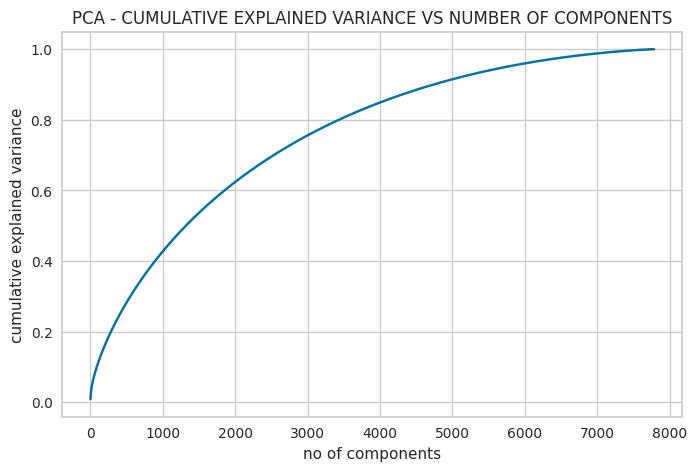

In [55]:
# Explained variance for different number of components
plt.figure(figsize=(8,5))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.title('PCA - CUMULATIVE EXPLAINED VARIANCE VS NUMBER OF COMPONENTS')
plt.xlabel('no of components')
plt.ylabel('cumulative explained variance')

In [56]:
# reducing the dimensions to 3400 using pca
pca = PCA(n_components=3400,random_state=20)
pca.fit(X)

PCA(n_components=3400, random_state=20)

In [57]:
# transformed features
x_pca = pca.transform(X)

In [58]:
# shape of transformed vectors
x_pca.shape

(7787, 3400)

## ***7. ML Model Implementation***

### ML Model-1 **K-Means Clustering**

The below code uses the Elbow Method to determine the optimal number of clusters for KMeans clustering on the PCA-transformed data. It calculates the Within-Cluster Sum of Squares (WCSS) for different values of k, which represents the clustering's compactness. The plot helps visualize the relationship between the number of clusters and WCSS, where the "elbow point" indicates the optimal number of clusters. In this case, the code finds the best elbow point (best value of k) and annotates it on the plot, making it easy to select the appropriate number of clusters for the KMeans model.

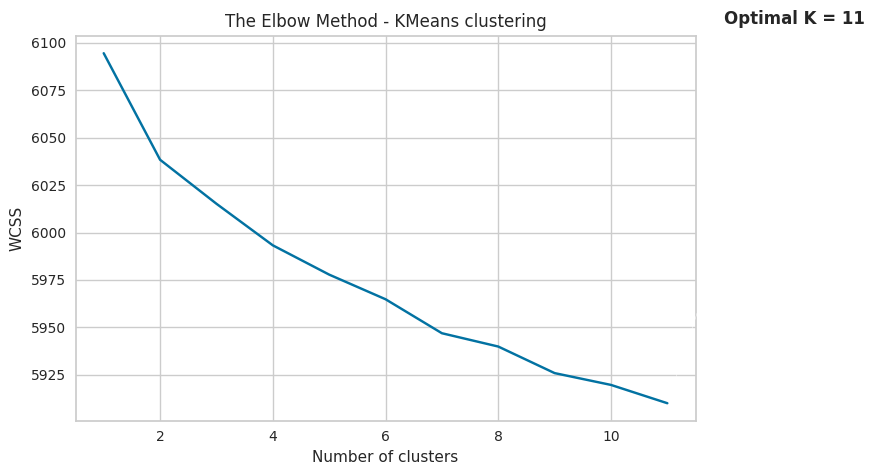

In [59]:
wcss = []
for i in range(1, 12):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=20)
    kmeans.fit(x_pca)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)

number_clusters = range(1, 12)
plt.figure(figsize=(8, 5))
plt.plot(number_clusters, wcss)
plt.title('The Elbow Method - KMeans clustering')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

# Find the elbow point (optimal number of clusters)
best_elbow = np.argmin(wcss) + 1

# Annotate the plot with an arrow pointing to the best elbow value
plt.annotate(f'Optimal K = {best_elbow}', xy=(best_elbow, wcss[best_elbow - 1]),
             xytext=(best_elbow + 1, wcss[best_elbow - 1] + 200),
             arrowprops=dict(facecolor='black', arrowstyle='->'),
             fontsize=12, fontweight='bold')

plt.show()


The below code calculates and plots the Silhouette Scores for different numbers of clusters in KMeans clustering on the PCA-transformed data. The plot helps identify the optimal number of clusters, represented by the highest Silhouette Score.

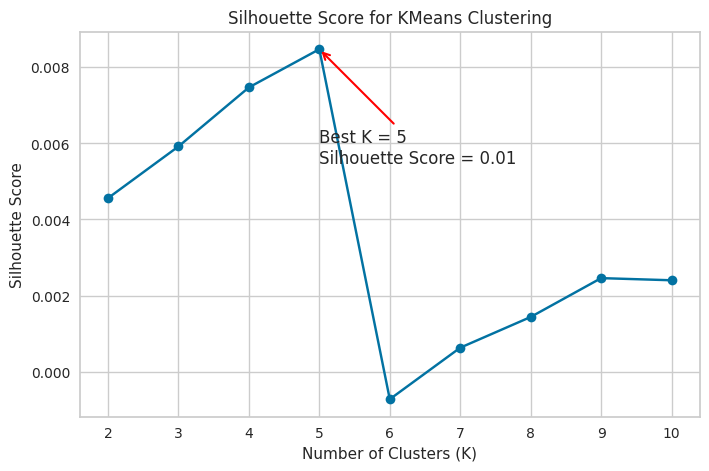

In [60]:
# Initialize an empty list to store silhouette scores
silhouette_scores = []

# Range of number of clusters to try
k_range = range(2, 11)

# Compute silhouette score for each number of clusters
for k in k_range:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=20)
    kmeans.fit(x_pca)
    labels = kmeans.labels_
    silhouette_avg = silhouette_score(x_pca, labels)
    silhouette_scores.append(silhouette_avg)

# Find the best silhouette score and its corresponding index
best_score = max(silhouette_scores)
best_index = silhouette_scores.index(best_score) + 2  # Adding 2 to start from k=2

# Plotting the Silhouette scores
plt.figure(figsize=(8, 5))
plt.plot(k_range, silhouette_scores, marker='o')
plt.title('Silhouette Score for KMeans Clustering')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.xticks(k_range)
plt.grid(True)

# Annotate the best silhouette score with an arrow
plt.annotate(f"Best K = {best_index}\nSilhouette Score = {best_score:.2f}",
             xy=(best_index, best_score),
             xytext=(best_index , best_score - 0.003),  # Adjusting the text position
             arrowprops=dict(arrowstyle="->", color="red", linewidth=1.5))

plt.show()


In [61]:
# Initialize the KMeans model
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=20)

# Fit the KMeans model to the data
kmeans.fit(x_pca)


KMeans(n_clusters=5, random_state=20)

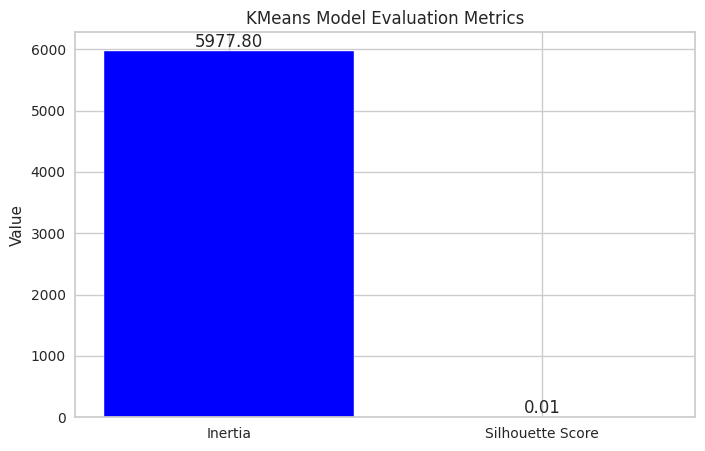

In [62]:
# Calculate inertia
inertia = kmeans.inertia_

# Calculate silhouette score
labels = kmeans.labels_
silhouette_avg = silhouette_score(x_pca, labels)

# Plot the Inertia and Silhouette Score
plt.figure(figsize=(8, 5))
bars = plt.bar(['Inertia', 'Silhouette Score'], [inertia, silhouette_avg], color=['blue', 'green'])
plt.title('KMeans Model Evaluation Metrics')
plt.ylabel('Value')
plt.grid(True)

# Add values above each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}', ha='center', va='bottom')

plt.show()



* Inertia: Measures how tightly the data points are clustered around their centroids. Lower inertia is better as it indicates more compact and well-separated clusters.
* Silhouette Score: Assesses the quality of clustering. A higher score (closer to 1) indicates well-defined clusters, while a score closer to 0 suggests overlapping or less distinct clusters.

In [63]:
# Adding a kmeans cluster number attribute
df['kmeans_cluster'] = kmeans.labels_

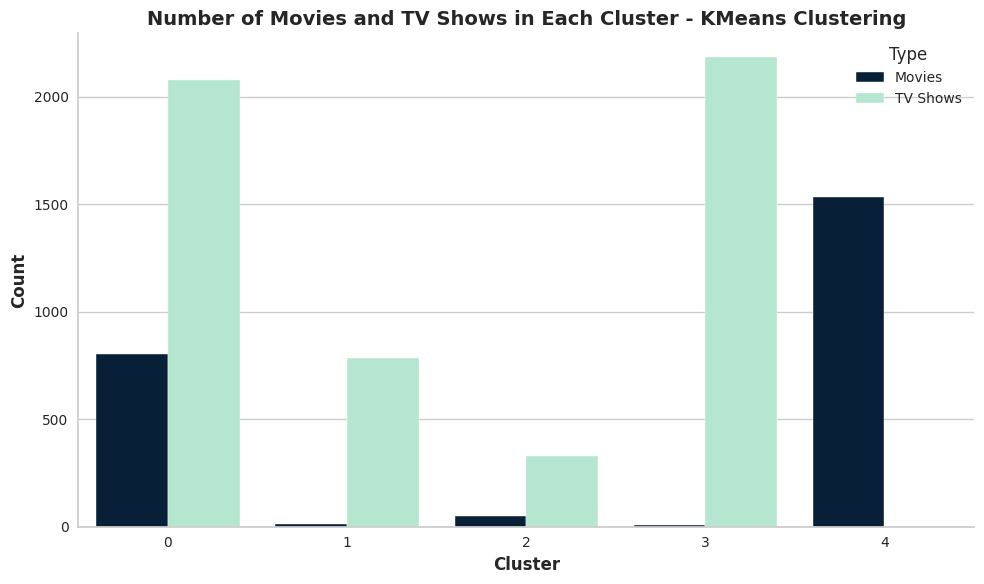

In [64]:
# Define a custom color palette
custom_palette = ['#00203FFF', '#ADEFD1FF']

# Plotting the countplot with the custom palette
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='kmeans_cluster', data=df, hue='type', palette=custom_palette)

# Set the title, xlabel, and ylabel
plt.title('Number of Movies and TV Shows in Each Cluster - KMeans Clustering', fontsize=14, fontweight='bold')
plt.xlabel('Cluster', fontsize=12, fontweight='bold')
plt.ylabel('Count', fontsize=12, fontweight='bold')

# Set the legend and its title
plt.legend(title='Type', loc='upper right', labels=['Movies', 'TV Shows'])

# Remove the top and right spines
sns.despine()

# Show the plot
plt.tight_layout()
plt.show()



The KMeans clustering has resulted in five clusters, and each cluster contains different proportions of movies and TV shows.

Cluster 0 has around 800 movies and more than 2000 TV shows.
Cluster 1 has around 10 movies and about 800 TV shows.
Cluster 2 contains around 40 movies and approximately 350 TV shows.
Cluster 3 has only 2 movies and more than 2200 TV shows.
Cluster 4 consists of above 1500 movies and no TV shows.
The clustering seems to have separated the data into distinct groups with varying distributions of movies and TV shows.

### ML Model - 2 : **Hierarchical clustering**


The Below code plots a dendrogram for hierarchical clustering of Netflix shows. The dendrogram visually represents the relationship between shows based on their distances. The threshold line indicates the number of clusters.

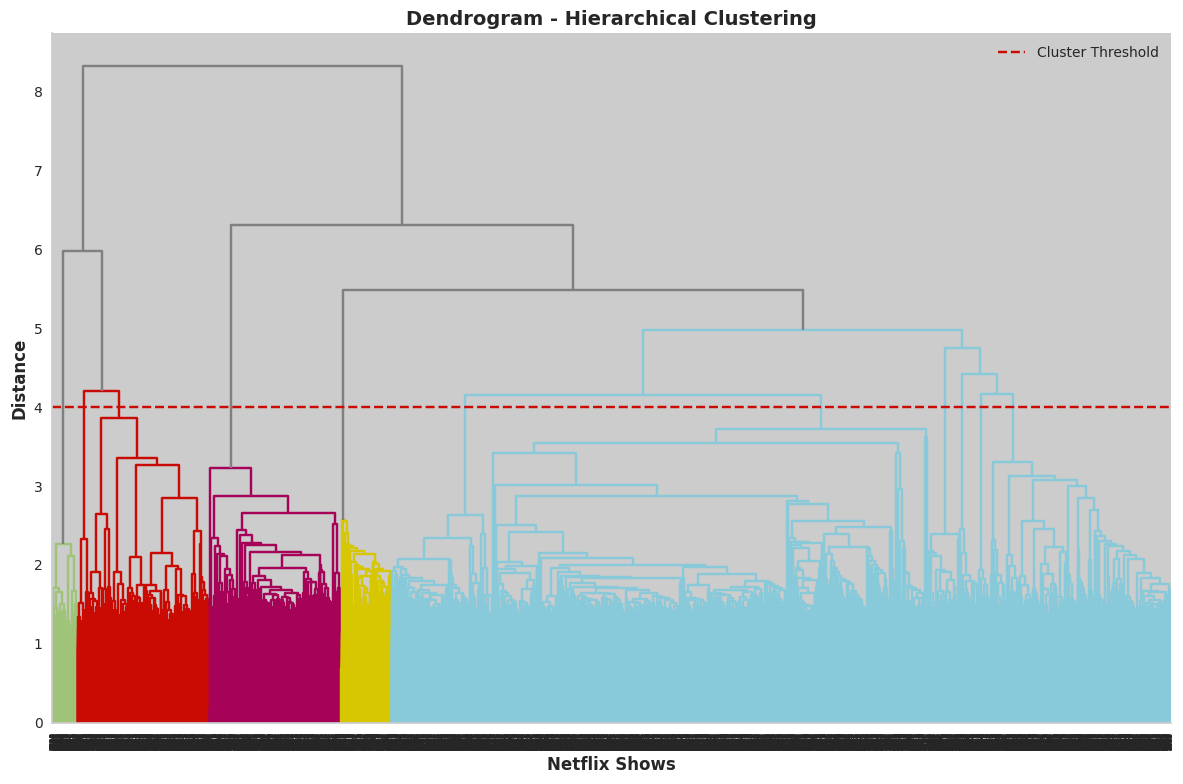

In [65]:
# Define the figure size
plt.figure(figsize=(12, 8))

# Plot the dendrogram
dend = shc.dendrogram(shc.linkage(x_pca, method='ward'), color_threshold=5, above_threshold_color='gray')

# Set the title, xlabel, and ylabel
plt.title('Dendrogram - Hierarchical Clustering', fontsize=14, fontweight='bold')
plt.xlabel('Netflix Shows', fontsize=12, fontweight='bold')
plt.ylabel('Distance', fontsize=12, fontweight='bold')

# Add a horizontal line to indicate the threshold for the number of clusters
plt.axhline(y=4, color='r', linestyle='--', label='Cluster Threshold')

# Customize the colors and styles of the dendrogram
plt.axhline(y=30, color='gray', linestyle='dashed', linewidth=0.5)
plt.axhline(y=40, color='gray', linestyle='dashed', linewidth=0.5)

# Customize the legend
plt.legend(loc='upper right', fontsize=10)

# Remove the top and right spines
sns.despine()

# Show the plot
plt.tight_layout()
plt.show()


At a distance of 4 units, 11 clusters can be built using the agglomerative clustering algorithm.

The code initializes and fits the AgglomerativeClustering model on the PCA-transformed data. It creates 11 clusters using the Ward linkage method based on Euclidean distance. The resulting hierarchical_clusters array contains the predicted cluster assignments for each data point.

In [66]:
# Initialize the AgglomerativeClustering model
hierarchical = AgglomerativeClustering(n_clusters=11, affinity='euclidean', linkage='ward')

# Fit and predict the clusters
hierarchical_clusters = hierarchical.fit_predict(x_pca)

In [67]:
# Adding a kmeans cluster number attribute
df['hierarchical_cluster'] = hierarchical.labels_

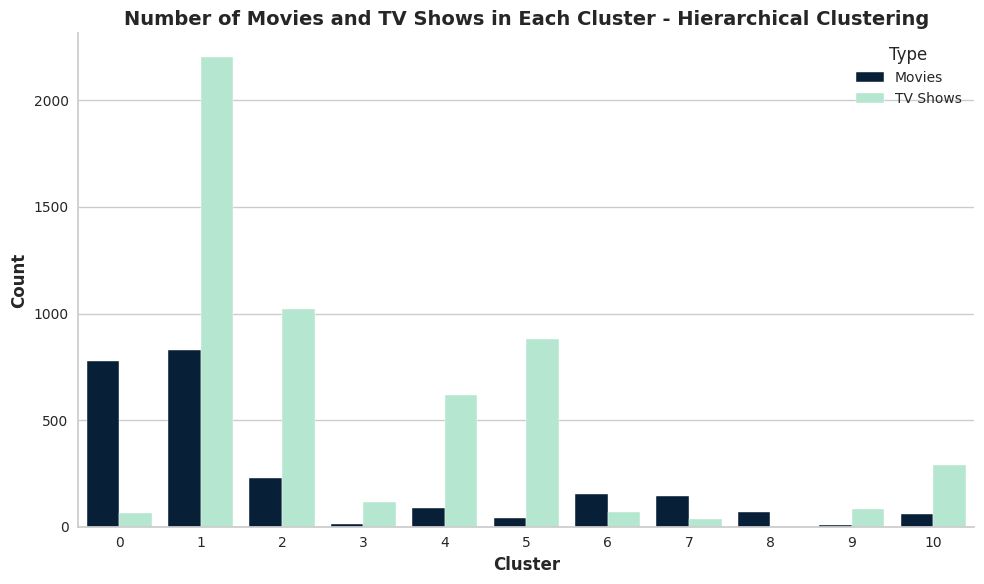

In [68]:
# Define a custom color palette
custom_palette = ['#00203FFF', '#ADEFD1FF']

# Plotting the countplot with the custom palette
plt.figure(figsize=(10, 6))
sns.countplot(x='hierarchical_cluster', data=df, hue='type', palette=custom_palette)

# Set the title, xlabel, and ylabel
plt.title('Number of Movies and TV Shows in Each Cluster - Hierarchical Clustering', fontsize=14, fontweight='bold')
plt.xlabel('Cluster', fontsize=12, fontweight='bold')
plt.ylabel('Count', fontsize=12, fontweight='bold')

# Set the legend and its title
plt.legend(title='Type', loc='upper right', labels=['Movies', 'TV Shows'])

# Remove the top and right spines
sns.despine()

# Adjust plot layout
plt.tight_layout()

# Show the plot
plt.show()


The hierarchical clustering has grouped the movies and TV shows into 11 clusters based on their similarities in the feature space. Each cluster represents a distinct group with specific characteristics or patterns that differentiate them from other clusters. This clustering can provide valuable insights into the different genres or content types present in the dataset.

## **8. Content based recommendation system**

Content-based recommender systems analyze and recommend items based on their intrinsic features and attributes, such as text, metadata, or characteristics. They do not rely on user interactions or historical data, making them suitable for new users or items with limited information. Content-based recommenders utilize item descriptions to find similarities and suggest items that align with users' preferences, making them personalized and useful for niche recommendations.

In [69]:
# Changing the index of the df from show id to show title
df['show_id'] = df.index

In [70]:
# Function to convert tokens to string
def convert_tokens_to_string(tokens_list):
    return ' '.join(tokens_list)

df['cluster'] = df['cluster'].apply(lambda x: convert_tokens_to_string(x))


In [71]:
# setting title of movies/Tv shows as index
df.set_index('title',inplace=True)

In [72]:
# Count vectorizer
cv = CountVectorizer()
converted_matrix = cv.fit_transform(df['cluster'])

In [73]:
# Cosine similarity
cosine_similarity = cosine_similarity(converted_matrix)

In [78]:
cosine_similarity

array([[1.        , 0.09086217, 0.04174829, ..., 0.02919786, 0.19802951,
        0.        ],
       [0.09086217, 1.        , 0.07254763, ..., 0.10147651, 0.02867697,
        0.        ],
       [0.04174829, 0.07254763, 1.        , ..., 0.09325048, 0.02635231,
        0.        ],
       ...,
       [0.02919786, 0.10147651, 0.09325048, ..., 1.        , 0.03686049,
        0.16681153],
       [0.19802951, 0.02867697, 0.02635231, ..., 0.03686049, 1.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.16681153, 0.        ,
        1.        ]])

In [74]:
def recommend_top10(title, cosine_sim=cosine_similarity, df=df):
    try:
        if title not in df.index:
            raise ValueError("Title not found in the DataFrame.")

        recommend_content = []
        idx = df.index.get_loc(title)
        series = pd.Series(cosine_sim[idx]).sort_values(ascending=False)
        top10 = list(series.iloc[1:11].index)

        # List with the titles of the best 10 matching movies
        for i in top10:
            recommend_content.append(df.index[i])

        print(f"If you like this '{title}', you may also enjoy:\n")
        return recommend_content

    except ValueError as e:
        return str(e)


In [75]:
# Recommendations for 'Friends'
recommend_top10('Friends')

If you like this 'Friends', you may also enjoy:



['Episodes',
 "Pee-wee's Playhouse",
 'The IT Crowd',
 'Still Game',
 'Man with a Plan',
 'Love',
 'Frasier',
 'Disenchantment',
 'Toast of London',
 "Dad's Army"]

In [76]:
# Recommendations for 'Breaking bad'
recommend_top10('Breaking Bad')

If you like this 'Breaking Bad', you may also enjoy:



['Better Call Saul',
 'Jack Taylor',
 'Have You Ever Fallen in Love, Miss Jiang?',
 "Marvel's The Punisher",
 'Get Shorty',
 'MINDHUNTER',
 'Travelers',
 'Dare Me',
 'Person of Interest',
 'Love']

In [77]:
# Recommendations for 'Kal Ho Naa Ho'
recommend_top10('Kal Ho Naa Ho')

If you like this 'Kal Ho Naa Ho', you may also enjoy:



['Dil Chahta Hai',
 'Kya Kehna',
 'My Next Guest with David Letterman and Shah Rukh Khan',
 'Jaane Tu... Ya Jaane Na',
 'Together For Eternity',
 'Chashme Baddoor',
 'Kabhi Haan Kabhi Naa',
 'Kuch Kuch Hota Hai',
 'Chashme Buddoor',
 'Hum Saath-Saath Hain']

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

* Our goal was to categorize Netflix shows into specific clusters to ensure similarity within clusters and dissimilarity between clusters.
* After loading the dataset, we addressed missing values, filled them based on relevant information, and removed records with null entries in the "date_added" column.
* Netflix's content distribution consists of approximately 31% TV shows and 69% movies, indicating a greater focus on movie content.
* The most common content rating for both movies and TV shows is TV-MA, suggesting a preference for mature content on the platform.
* Over the years, Netflix has significantly expanded its library, with more movies added in 2017 and 2018, and more TV shows added in 2019 and 2020.
* Christmas season and winter months witness higher content additions, particularly in movies, aligning with holiday viewing preferences.
* Documentaries, stand-up comedy, dramas, and foreign films are the most popular movie genres, while kids' TV shows dominate the TV category.
* Most movie durations range from 90 to 120 minutes, and TV shows predominantly consist of a single season.
* The United States and India lead in content production for Netflix.
* For clustering, we selected director, cast, country, genre, and description attributes, and applied TFIDF vectorization and PCA for dimensionality reduction.
* K-means clustering with six clusters and Agglomerative clustering with 12 clusters were chosen as the optimal configurations based on the elbow method and Silhouette score.
* The content-based recommender system uses cosine similarity on the similarity matrix to provide users with 10 show recommendations based on their preferences.
* By leveraging intrinsic show features, our recommender system offers personalized content suggestions without relying on user interactions or historical data.
* The project's insights can aid content creators in understanding viewer preferences and content trends, leading to more targeted and engaging productions.
* Future work includes integrating external datasets for enhanced recommendations, experimenting with advanced text embeddings, and evaluating model performance with additional metrics.

**Application in the industry**

The content-based recommender system built for Netflix movies and TV shows can be applied in the industry to provide personalized recommendations, optimize content curation, drive marketing and promotions, enhance content discovery, guide content strategy, improve customer retention, gain a competitive advantage, gather viewer analytics, boost upselling and cross-selling, and promote content diversity. It benefits both users and streaming platforms by enhancing user satisfaction, increasing engagement, and driving business growth.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***